## Reading and combining data from json files stored in drive

In [ ]:
import os
import numpy as np
import json
import pickle

def load_and_save_combined_data(load_dir, save_dir, force_reprocess=False):
    combined_data_path = os.path.join(save_dir, 'combined_data.pkl')

    if os.path.exists(combined_data_path) and not force_reprocess:
        print("Loading pre-processed combined data...")
        with open(combined_data_path, 'rb') as f:
            return pickle.load(f)

    print("Processing and combining data...")
    train_data = {'depths': [], 'paths': {'paths': [], 'rgb_paths': []}}
    test_data = {'depths': [], 'paths': {'paths': [], 'rgb_paths': []}}
    folders = ['0001', '0003', '0005', '0006', '0008']

    # Load all data
    for folder in folders:
        folder_path = os.path.join(load_dir, 'train', folder)
        if os.path.isdir(folder_path):
            depths = np.load(os.path.join(folder_path, 'depths.npy'))
            with open(os.path.join(folder_path, 'paths.json'), 'r') as f:
                paths = json.load(f)

            if folder == '0006':
                test_data['depths'].append(depths)
                test_data['paths']['paths'].extend(paths['depth_paths'])
                test_data['paths']['rgb_paths'].extend(paths['rgb_paths'])
            else:
                train_data['depths'].append(depths)
                train_data['paths']['paths'].extend(paths['depth_paths'])
                train_data['paths']['rgb_paths'].extend(paths['rgb_paths'])

    # Concatenate data
    train_data['depths'] = np.concatenate(train_data['depths'])
    test_data['depths'] = np.concatenate(test_data['depths'])

    combined_data = (train_data, test_data)

    # Save combined data
    os.makedirs(save_dir, exist_ok=True)
    with open(combined_data_path, 'wb') as f:
        pickle.dump(combined_data, f)

    total_samples = len(train_data['depths']) + len(test_data['depths'])
    print(f"Combined data saved to {combined_data_path}")
    print(f"Train set size: {len(train_data['depths'])} ({len(train_data['depths'])/total_samples:.2%})")
    print(f"Validation set size: {len(test_data['depths'])} ({len(test_data['depths'])/total_samples:.2%})")

    return combined_data

In [ ]:
import os
import numpy as np
import json
import pickle
def load_and_save_combined_data(load_dir, save_dir, force_reprocess=False):
    combined_data_path = os.path.join(save_dir, 'combined_data.pkl')

    if os.path.exists(combined_data_path) and not force_reprocess:
        print("Loading pre-processed combined data...")
        with open(combined_data_path, 'rb') as f:
            return pickle.load(f)

    print("Processing and combining data...")
    train_data = {'depths': [], 'paths': {'paths': [], 'rgb_paths': []}}
    test_data = {'depths': [], 'paths': {'paths': [], 'rgb_paths': []}}
    train_folders = ['0001', '0003', '0005', '0008']
    test_folders = ['0006']

    # Load train data
    for folder in train_folders:
        folder_path = os.path.join(load_dir, 'train', folder)
        if os.path.isdir(folder_path):
            depths = np.load(os.path.join(folder_path, 'depths.npy'))
            with open(os.path.join(folder_path, 'paths.json'), 'r') as f:
                paths = json.load(f)

            train_data['depths'].append(depths)
            train_data['paths']['paths'].extend(paths['depth_paths'])
            train_data['paths']['rgb_paths'].extend(paths['rgb_paths'])

    # Load test data
    for folder in test_folders:
        folder_path = os.path.join(load_dir, 'test', folder)
        if os.path.isdir(folder_path):
            depths = np.load(os.path.join(folder_path, 'depths.npy'))
            with open(os.path.join(folder_path, 'paths.json'), 'r') as f:
                paths = json.load(f)

            test_data['depths'].append(depths)
            test_data['paths']['paths'].extend(paths['depth_paths'])
            test_data['paths']['rgb_paths'].extend(paths['rgb_paths'])

    # Concatenate data
    train_data['depths'] = np.concatenate(train_data['depths'])
    test_data['depths'] = np.concatenate(test_data['depths'])

    combined_data = (train_data, test_data)

    # Save combined data
    os.makedirs(save_dir, exist_ok=True)
    with open(combined_data_path, 'wb') as f:
        pickle.dump(combined_data, f)

    total_samples = len(train_data['depths']) + len(test_data['depths'])
    print(f"Combined data saved to {combined_data_path}")
    print(f"Train set size: {len(train_data['depths'])} ({len(train_data['depths'])/total_samples:.2%})")
    print(f"Test set size: {len(test_data['depths'])} ({len(test_data['depths'])/total_samples:.2%})")

    return combined_data

In [ ]:
# Usage
load_dir = '/content/drive/MyDrive/Dataset'
save_dir = '/content/drive/MyDrive/Dataset'
train_data, test_data = load_and_save_combined_data(load_dir, save_dir)

Processing and combining data...
Combined data saved to /content/drive/MyDrive/Dataset/combined_data.pkl
Train set size: 9460 (79.03%)
Test set size: 2510 (20.97%)


## ResNet Transfer Model



> First Experiment





In [ ]:
import shutil
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rgb_root_folder = '/content/drive/MyDrive/RGB'
depth_root_folder = '/content/drive/MyDrive/Depth'
save_dir = '/content/drive/MyDrive/Dataset'

In [ ]:
import pickle
import numpy as np

def load_combined_data(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

In [ ]:
# Load the combined data: it takes 5 sec - 1.5GB
file_path = "/content/drive/MyDrive/Dataset/combined_data.pkl"
train_data_subset_resnet, test_data_subset_resnet = load_combined_data(file_path)

In [ ]:
# Load the combined data: it takes 5 sec - 1.5GB
file_path = "/content/drive/MyDrive/Dataset/combined_data_subset.pkl"
train_data_subset_resnet, val_data_subset_resnet, test_data_subset_resnet = load_combined_data(file_path)

In [ ]:
depths = train_data_subset_resnet['depths']

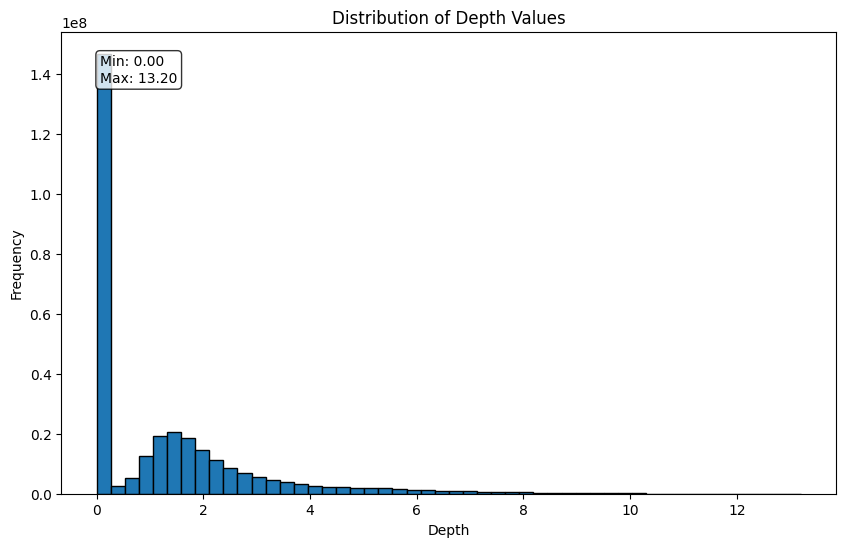

Validation depth min: 0.0, max: 13.204679489135742


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


depths = train_data_subset_resnet['depths']


depths_flat = depths.flatten()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(depths_flat, bins=50, edgecolor='black')

# Add labels and title
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Depth Values')

# Add text box with min and max values
min_depth = depths_flat.min()
max_depth = depths_flat.max()
plt.text(0.05, 0.95, f'Min: {min_depth:.2f}\nMax: {max_depth:.2f}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Show the plot
plt.show()

# Print min and max values
print(f"Validation depth min: {min_depth}, max: {max_depth}")

In [ ]:
from itertools import permutations
import torchvision.transforms as T

In [ ]:
import torch
from torch.utils.data import Dataset
import cv2
import numpy as np
import random
from itertools import permutations

class DepthDataset(Dataset):
    def __init__(self, loaded_data, height=480, width=640, augment=True, channel_swap_prob=0.5, max_depth=13.20):
        self.depths = loaded_data['depths']
        self.rgb_paths = loaded_data['paths']['rgb_paths']
        self.depth_paths = loaded_data['paths']['paths']
        self.height = height
        self.width = width
        self.augment = augment
        self.channel_swap_prob = channel_swap_prob
        self.channel_permutations = list(permutations(range(3), 3))
        self.max_depth = max_depth
        self.mean = np.array([0.429, 0.488, 0.496])
        self.std = np.array([0.215, 0.219, 0.274])

    def __len__(self):
        return len(self.rgb_paths)

    def __getitem__(self, idx):
        rgb_path = self.rgb_paths[idx]
        depth = self.depths[idx]

        # Decide whether to flip (for augmentation)
        flip = random.choice([True, False]) if self.augment else False

        # Preprocess RGB image
        image = self.preprocess_image(rgb_path, flip)

        # Apply channel swap if augmentation is enabled
        if self.augment and random.random() < self.channel_swap_prob:
            image = self.channel_swap(image)

        # Preprocess depth map
        depth = self.preprocess_depth(depth, flip)

        mask = self.create_depth_mask(depth)

        # Convert to PyTorch tensors
        image = torch.from_numpy(image.transpose((2, 0, 1))).float()
        image = T.Normalize([0.429, 0.488, 0.496],[0.215, 0.219, 0.274])(image)
        depth = torch.from_numpy(depth.transpose((2, 0, 1))).float()
        mask = torch.from_numpy(mask.transpose((2, 0, 1))).float()


        return image, depth, mask

    def preprocess_image(self, img_path, flip):
        # Read and resize the image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        resized_img = cv2.resize(img, (self.width, self.height)).astype(np.float32)
        resized_img =  resized_img  / 255.0

        # Normalize image to have the same normalization as the pre trained model

        # Flip the image horizontally if required
        if flip:
            resized_img = cv2.flip(resized_img, 1)



        return resized_img

    def preprocess_depth(self, depth, flip):
        # Resize the depth map
        resized_depth = cv2.resize(depth, (640, 480)).astype(np.float32)

        resized_depth = resized_depth

        # Flip the depth map horizontally if required
        if flip:
            resized_depth = cv2.flip(resized_depth, 1)

        # Add color channel
        resized_depth = np.expand_dims(resized_depth, axis=-1)

        return resized_depth

    def channel_swap(self, image):
        # Randomly select a channel permutation
        permutation = random.choice(self.channel_permutations)
        # Apply the permutation
        return image[..., permutation]

    def create_depth_mask(self, depth):
        # Create mask: True for depth values > 0 and < 10
        mask = (depth > 0) & (depth < 13.20)
        return mask.astype(np.float32)

In [ ]:
train_dataset_subset = DepthDataset(train_data_subset_resnet, augment=True, channel_swap_prob=0.25, max_depth=13.20)
test_dataset_subset = DepthDataset(val_data_subset_resnet, augment=False, max_depth=13.20)

train_loader_subset = torch.utils.data.DataLoader(train_dataset_subset, batch_size=8, shuffle=True)
test_loader_subset = torch.utils.data.DataLoader(test_dataset_subset, batch_size=16, shuffle=False)

In [ ]:
def eval_depth(pred, target):
    assert pred.shape == target.shape

    thresh = torch.max((target / pred), (pred / target))

    d1 = torch.sum(thresh < 1.25).float() / len(thresh)

    diff = pred - target
    diff_log = torch.log(pred) - torch.log(target)

    abs_rel = torch.mean(torch.abs(diff) / target)

    rmse = torch.sqrt(torch.mean(torch.pow(diff, 2)))
    mae = torch.mean(torch.abs(diff))

    return {'d1': d1.detach(), 'abs_rel': abs_rel.detach(),'rmse': rmse.detach(), 'mae': mae.detach()}



In [ ]:
import numpy as np
import os
import scipy.io as sio

def save_depth_data(image, true_depth, pred_depth, mask, save_path, epoch):
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    image = image.cpu().numpy()
    true_depth = true_depth.cpu().numpy()
    pred_depth = pred_depth.cpu().numpy()
    mask = mask.cpu().numpy()

    # Apply mask to depth maps
    true_depth = np.ma.masked_where(mask == 0, true_depth).filled(np.nan)
    pred_depth = np.ma.masked_where(mask == 0, pred_depth).filled(np.nan)

    # Create a dictionary to store the data
    data = {
        'epoch': epoch,
        'image': image,
        'true_depth': true_depth,
        'pred_depth': pred_depth,
        'mask': mask
    }

    # Save the data to a .mat file
    sio.savemat(save_path, data)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    num_batches = len(train_loader)

    for batch_idx, (data, target, mask) in enumerate(train_loader):

        data, target, mask = data.to(device), target.to(device), mask.to(device).bool()

        optimizer.zero_grad()
        output = model(data)
        #output = torch.unsqueeze(output, 1)

        valid_mask = (output <= 13.20) & (output >= 0.001)

        output = output[mask]

        target = target[mask]

        l_depth = criterion(output, target)
        # l_ssim = torch.clamp((1 - ssim_loss(output, target, window_size=11)) * 0.5, 0, 1)
        loss =  l_depth # (1.0 * l_ssim) + (0.1 * l_depth)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # if (batch_idx + 1) % 100 == 0:
            # print(f'Batch {batch_idx + 1}/{num_batches}, Loss: {loss.item():.4f}')



    avg_loss = total_loss / len(train_loader)
    return avg_loss

In [ ]:
def validate(model, val_loader, criterion, device,epoch,save_path, num_visualizations=5):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    results = { 'd1': 0, 'abs_rel': 0,'rmse': 0, 'mae': 0  }
    num_batches = len(val_loader)

    vis_batch_indices = random.sample(range(num_batches), num_visualizations)

    for batch_idx, (data, target, mask) in enumerate(val_loader):

        data, target, mask = data.to(device), target.to(device), mask.to(device).bool()


        with torch.no_grad():

          output = model(data)
          #output = torch.unsqueeze(output, 1)

        # valid_mask = (target <= 13.20) & (target >= 0.001)

        cur_results = eval_depth(output[mask], target[mask])

        save_depth_data(data, output, target, mask, '/content/drive/MyDrive/Results/depth_data_epoch_{}.mat'.format(epoch), epoch)

        for k in results.keys():

          if isinstance(cur_results[k], torch.Tensor):

            if cur_results[k].numel() == 1:

              results[k] += cur_results[k].item()

            else:

              results[k] += cur_results[k].cpu().numpy().mean()

          elif isinstance(cur_results[k], np.ndarray):

            results[k] += cur_results[k].mean()

          else:

           results[k] += float(cur_results[k])

    for k in results.keys():

      results[k] = round(results[k] / len(val_loader), 3)

    return results

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class DepthEstimationResNet(nn.Module):
    def __init__(self):
        super(DepthEstimationResNet, self).__init__()

        # Load a ResNet-50 model with pretrained weights
        resnet = models.resnet50(pretrained=True)

        # Extract the layers up to the last convolutional block (before the average pooling)
        self.encoder = nn.Sequential(*list(resnet.children())[:-2])

        # Decoder with precise upsampling to match input dimensions
        self.decoder = nn.Sequential(
            nn.Conv2d(2048, 1024, kernel_size=3, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)
            # Output size will be 480x640 due to padding and stride
        )

    def forward(self, x):
        x = self.encoder(x)  # Pass input through the encoder
        x = self.decoder(x)  # Pass the output through the decoder
        return x  # Output the depth map

# Instantiate the model
model = DepthEstimationResNet()

# Create a toy input tensor with shape [8, 3, 480, 640]
input_tensor = torch.randn(8, 3, 480, 640)

# Pass the input through the model
output_tensor = model(input_tensor)

# Print the shape of the output
print(f"Input shape: {input_tensor.shape}")
print(f"Output shape: {output_tensor.shape}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 136MB/s]


Input shape: torch.Size([8, 3, 480, 640])
Output shape: torch.Size([8, 1, 480, 640])


In [ ]:

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")

Total trainable parameters: 53530497


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DepthEstimationResNet()
model = model.to(device)

## Trying the model on full dataset

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DepthEstimationResNet()
model = model.to(device)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.SmoothL1Loss()
num_epochs = 10
save_path = '/content/drive/MyDrive/Results'
for epoch in range(num_epochs):
    train_loss = train(model, train_loader_subset, optimizer, criterion, device)
    print(train_loss)
    results = validate(model, test_loader_subset, criterion, device, epoch, save_path)

    scheduler.step(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, val_metrics: {results} ")
    print()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


0.4063820420612446
Epoch 1/10
Train Loss: 0.4064, val_metrics: {'d1': 0.424, 'abs_rel': 0.358, 'rmse': 0.964, 'mae': 0.661} 

0.25513974841706144
Epoch 2/10
Train Loss: 0.2551, val_metrics: {'d1': 0.509, 'abs_rel': 0.336, 'rmse': 0.964, 'mae': 0.622} 

0.20212489355194901
Epoch 3/10
Train Loss: 0.2021, val_metrics: {'d1': 0.547, 'abs_rel': 0.324, 'rmse': 0.895, 'mae': 0.581} 

0.16321251916109458
Epoch 4/10
Train Loss: 0.1632, val_metrics: {'d1': 0.587, 'abs_rel': 0.31, 'rmse': 0.876, 'mae': 0.557} 

0.1376539824730445
Epoch 5/10
Train Loss: 0.1377, val_metrics: {'d1': 0.57, 'abs_rel': 0.326, 'rmse': 0.858, 'mae': 0.56} 

0.1250988389078027
Epoch 6/10
Train Loss: 0.1251, val_metrics: {'d1': 0.587, 'abs_rel': 0.315, 'rmse': 0.812, 'mae': 0.534} 

0.10462662077879664
Epoch 7/10
Train Loss: 0.1046, val_metrics: {'d1': 0.589, 'abs_rel': 0.26, 'rmse': 0.782, 'mae': 0.504} 

0.09864895867651434
Epoch 8/10
Train Loss: 0.0986, val_metrics: {'d1': 0.594, 'abs_rel': 0.268, 'rmse': 0.832, 'mae': 

## ResNet vs UNet

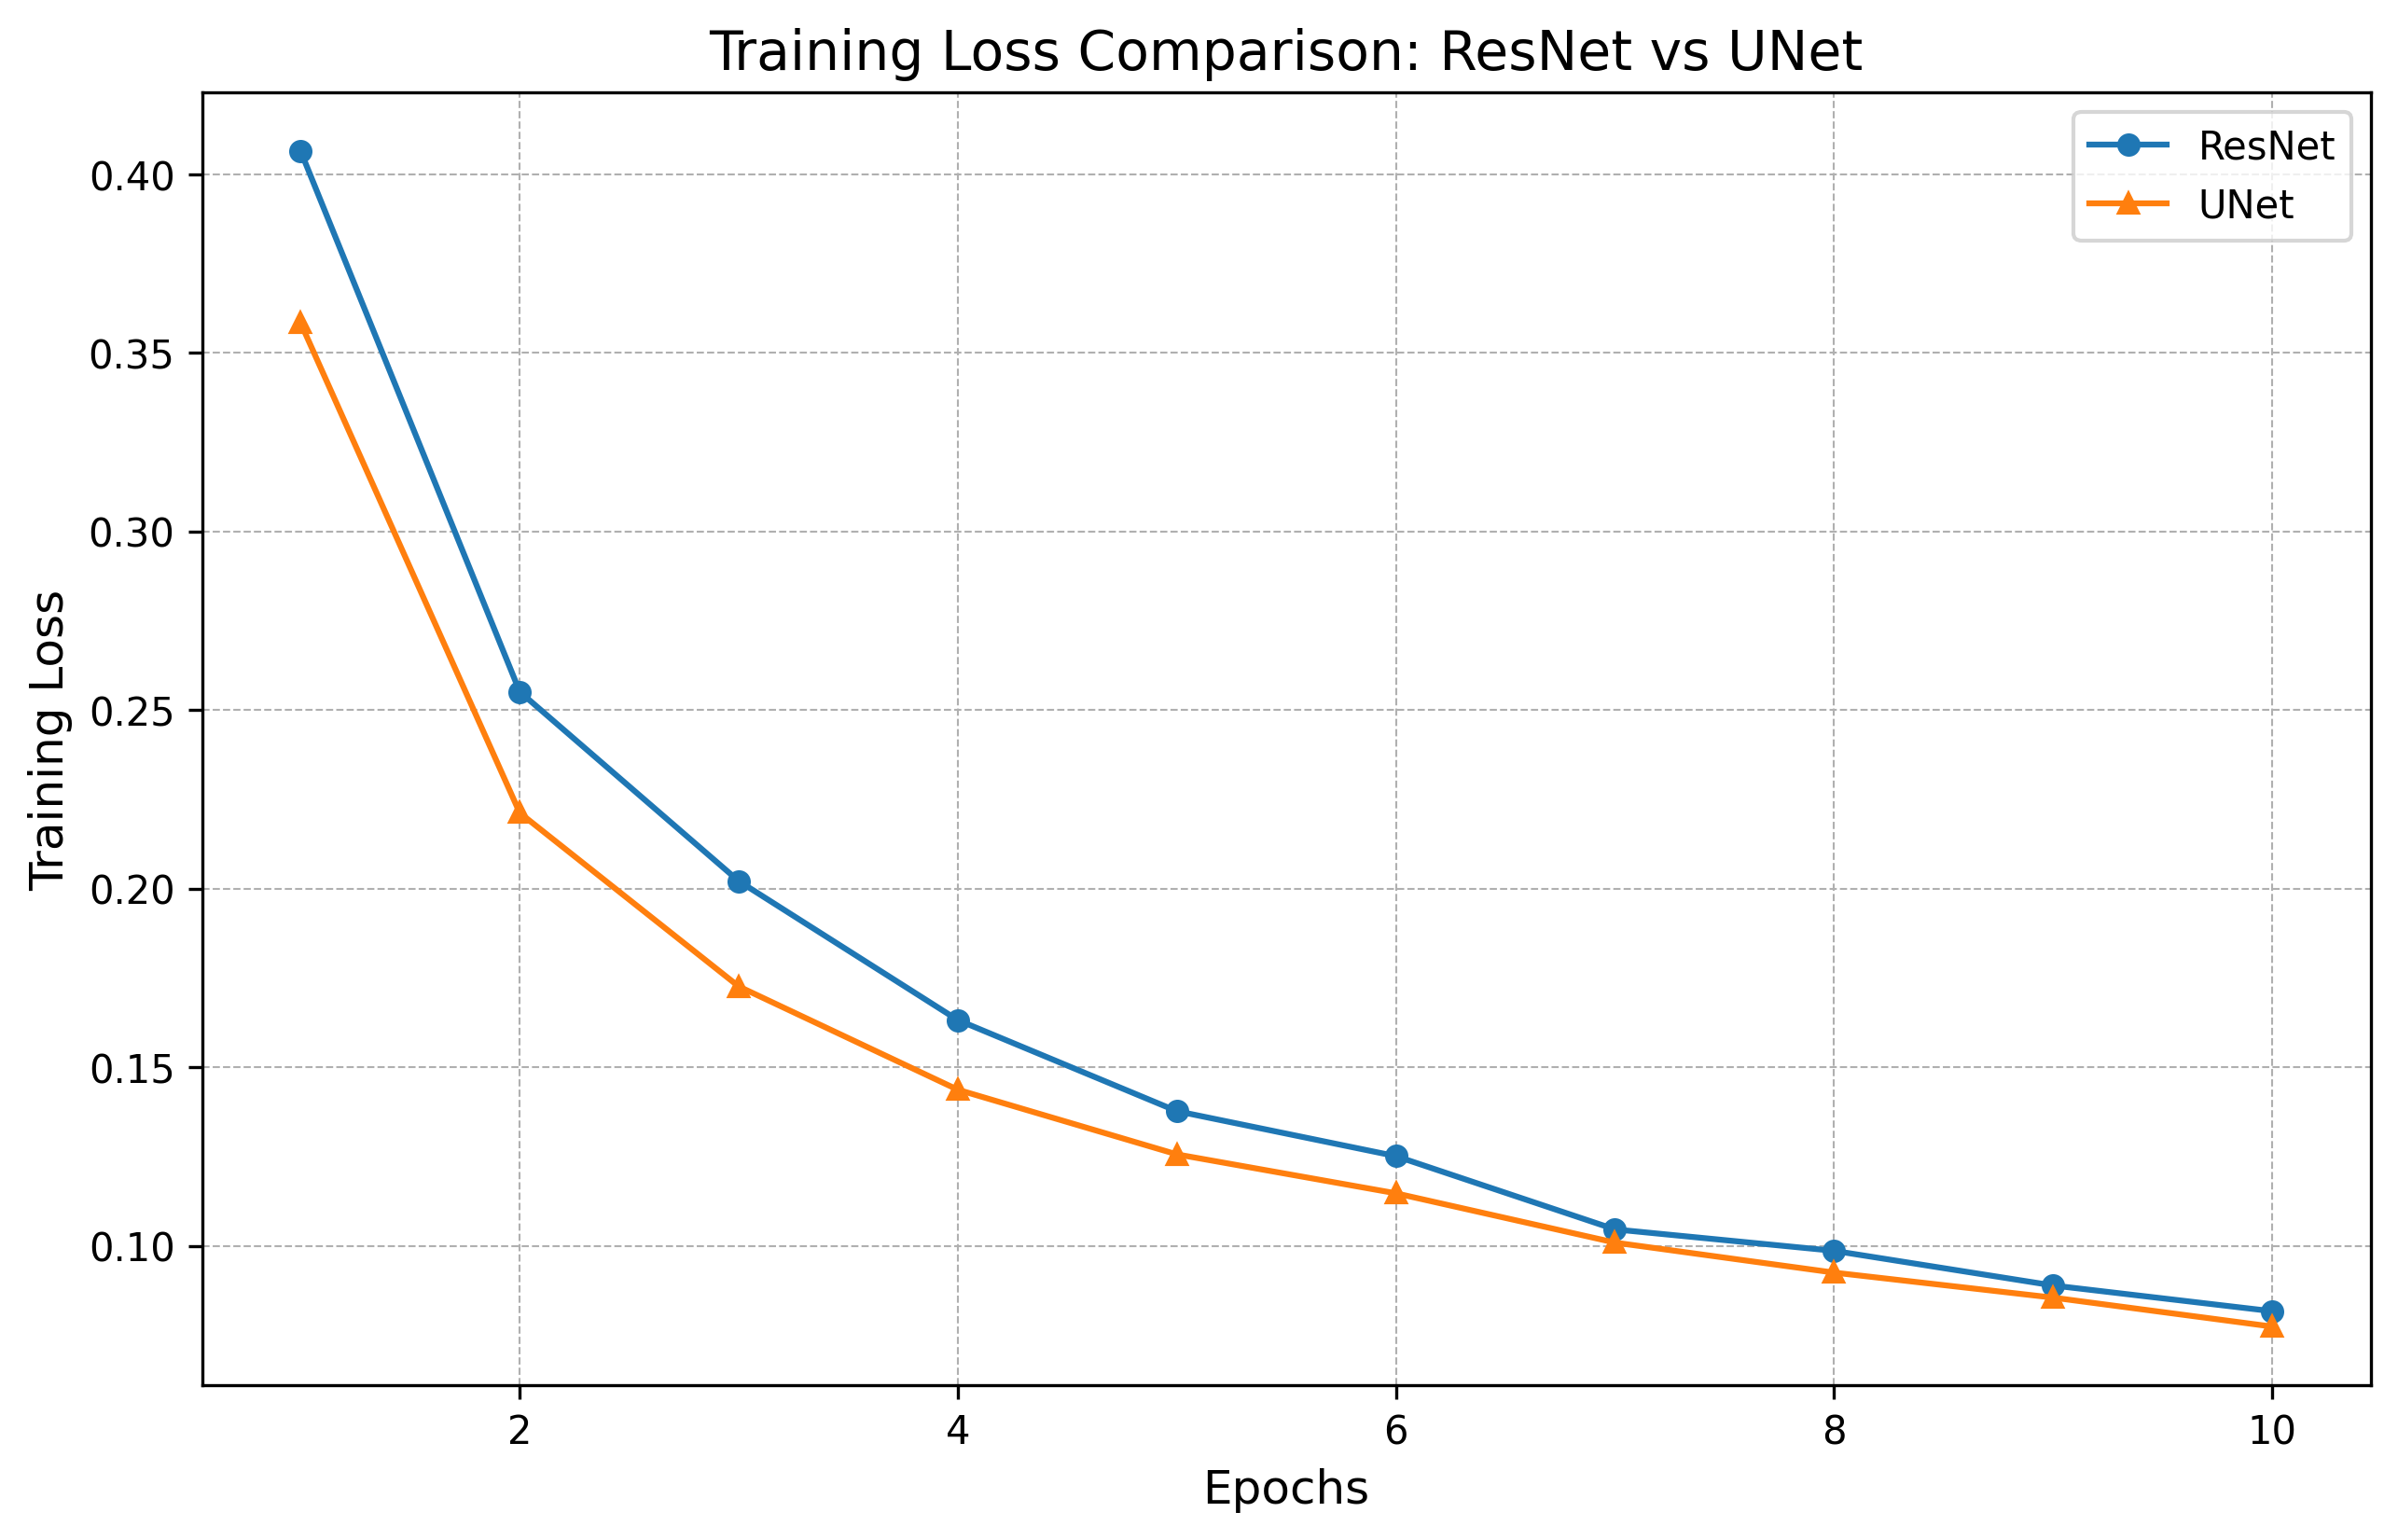

In [ ]:
import matplotlib.pyplot as plt

# Data for training loss
resnet_smooth_l1_loss = [0.4064, 0.2551, 0.2021, 0.1632, 0.1377,0.1251, 0.1046, 0.0986, 0.0889, 0.0817]
unet_smooth_l1_loss = [0.3583, 0.2212, 0.1726, 0.1437, 0.1256, 0.1147, 0.1009, 0.0925, 0.0855, 0.0774]


# Epochs
epochs = range(1, len(resnet_smooth_l1_loss) + 1)

# Plotting the training loss
plt.figure(figsize=(10, 6), dpi=300)  # Slightly larger figure for better readability

plt.plot(epochs, resnet_smooth_l1_loss, 'o-', label='ResNet', markersize=5, linewidth=1.5)
plt.plot(epochs, unet_smooth_l1_loss, '^-', label='UNet', markersize=5, linewidth=1.5)

# Adjusting font sizes for better readability
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Training Loss', fontsize=12)
plt.title('Training Loss Comparison: ResNet vs UNet', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)

# Saving the figure as a high-resolution PNG, suitable for LaTeX
plt.savefig('training_loss_comparison.png', bbox_inches='tight', pad_inches=0.05)

# Displaying the plot
plt.show()

## Results of Full Dataset

In [ ]:
import os
import numpy as np
from scipy import io
import matplotlib.pyplot as plt

def normalize_image(img):
    mean = np.array([0.429, 0.488, 0.496])[:, None, None]
    std = np.array([0.215, 0.219, 0.274])[:, None, None]
    return (img * 255 - mean) / std

def process_depth(depth):
    return np.nan_to_num(depth, nan=0.0)

def denormalize_for_display(img):
    mean = np.array([0.429, 0.488, 0.496])[:, None, None]
    std = np.array([0.215, 0.219, 0.274])[:, None, None]
    return np.clip((img * std + mean) * 255, 0, 255).astype(np.uint8)

results_dir = '/content/drive/MyDrive/Results'
mat_files = sorted([f for f in os.listdir(results_dir) if f.endswith('.mat')])

for file in mat_files:
    file_path = os.path.join(results_dir, file)
    data = io.loadmat(file_path)

    if 'image' in data and 'pred_depth' in data and 'true_depth' in data:
        images = data['image']
        pred_depths = process_depth(data['pred_depth'])
        true_depths = process_depth(data['true_depth'])

        print(f"File: {file}")
        print(f"Image shape: {images.shape}")
        print(f"Predicted depth shape: {pred_depths.shape}")
        print(f"True depth shape: {true_depths.shape}")

        for i in range(images.shape[0]):  # Iterate over the first dimension (6)
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

            # Display image
            img = images[i]
            img_display = denormalize_for_display(img)
            ax1.imshow(np.transpose(img_display, (1, 2, 0)))
            ax1.set_title(f'Image {i+1}')
            ax1.axis('off')

            # Display predicted depth
            pred_depth = pred_depths[i, 0]
            im2 = ax2.imshow(pred_depth, cmap='plasma')
            ax2.set_title(f'Predicted Depth {i+1}')
            ax2.axis('off')
            plt.colorbar(im2, ax=ax2, label='Depth')

            # Display true depth
            true_depth = true_depths[i, 0]
            im3 = ax3.imshow(true_depth, cmap='plasma')
            ax3.set_title(f'True Depth {i+1}')
            ax3.axis('off')
            plt.colorbar(im3, ax=ax3, label='Depth')

            plt.suptitle(f'Data from {file} - Set {i+1}')
            plt.tight_layout()
            plt.show()
    else:
        print(f"Required data not found in {file}")

## First Experiment

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DepthEstimationResNet()
model = model.to(device)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.SmoothL1Loss()
num_epochs = 10
save_path = '/content/drive/MyDrive/Results'
for epoch in range(num_epochs):
    train_loss = train(model, train_loader_subset, optimizer, criterion, device)
    print(train_loss)
    results = validate(model, val_loader_subset, criterion, device, epoch, save_path)

    scheduler.step(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, val_metrics: {results} ")
    print()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


0.8118866040706635
Epoch 1/10
Train Loss: 0.8119, val_metrics: {'d1': 0.299, 'abs_rel': 0.606, 'rmse': 1.717, 'mae': 1.147} 

0.6987374670505524
Epoch 2/10
Train Loss: 0.6987, val_metrics: {'d1': 0.405, 'abs_rel': 0.687, 'rmse': 1.346, 'mae': 0.934} 

0.5621177552938461
Epoch 3/10
Train Loss: 0.5621, val_metrics: {'d1': 0.422, 'abs_rel': 0.658, 'rmse': 1.302, 'mae': 0.896} 

0.5008540954589844
Epoch 4/10
Train Loss: 0.5009, val_metrics: {'d1': 0.425, 'abs_rel': 0.724, 'rmse': 1.315, 'mae': 0.921} 

0.4759733674526215
Epoch 5/10
Train Loss: 0.4760, val_metrics: {'d1': 0.449, 'abs_rel': 0.535, 'rmse': 1.202, 'mae': 0.802} 

0.4542074077129364
Epoch 6/10
Train Loss: 0.4542, val_metrics: {'d1': 0.404, 'abs_rel': 0.459, 'rmse': 1.324, 'mae': 0.861} 

0.4261844997406006
Epoch 7/10
Train Loss: 0.4262, val_metrics: {'d1': 0.483, 'abs_rel': 0.687, 'rmse': 1.172, 'mae': 0.816} 

0.42106656086444855
Epoch 8/10
Train Loss: 0.4211, val_metrics: {'d1': 0.5, 'abs_rel': 0.515, 'rmse': 1.099, 'mae': 0.

## Effect of Loss

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.L1Loss()
num_epochs = 10
save_path = '/content/drive/MyDrive/Results'
for epoch in range(num_epochs):
    train_loss = train(model, train_loader_subset, optimizer, criterion, device)
    print(train_loss)
    results = validate(model, val_loader_subset, criterion, device, epoch, save_path)

    scheduler.step(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, val_metrics: {results} ")
    print()

0.9898130660057067
Epoch 1/10
Train Loss: 0.9898, val_metrics: {'d1': 0.415, 'abs_rel': 0.531, 'rmse': 1.286, 'mae': 0.863} 

0.7907651510238648
Epoch 2/10
Train Loss: 0.7908, val_metrics: {'d1': 0.475, 'abs_rel': 0.52, 'rmse': 1.125, 'mae': 0.744} 

0.7554053332805634
Epoch 3/10
Train Loss: 0.7554, val_metrics: {'d1': 0.484, 'abs_rel': 0.664, 'rmse': 1.186, 'mae': 0.786} 

0.7397934551239014
Epoch 4/10
Train Loss: 0.7398, val_metrics: {'d1': 0.426, 'abs_rel': 0.482, 'rmse': 1.327, 'mae': 0.858} 

0.69591655087471
Epoch 5/10
Train Loss: 0.6959, val_metrics: {'d1': 0.518, 'abs_rel': 0.48, 'rmse': 1.051, 'mae': 0.684} 

0.6766093039512634
Epoch 6/10
Train Loss: 0.6766, val_metrics: {'d1': 0.537, 'abs_rel': 0.559, 'rmse': 1.027, 'mae': 0.685} 

0.6465184712409973
Epoch 7/10
Train Loss: 0.6465, val_metrics: {'d1': 0.549, 'abs_rel': 0.473, 'rmse': 0.979, 'mae': 0.642} 

0.6386787254810333
Epoch 8/10
Train Loss: 0.6387, val_metrics: {'d1': 0.545, 'abs_rel': 0.508, 'rmse': 1.033, 'mae': 0.681

## Simple Encode Decoder architecture

In [ ]:
import torch
import torch.nn as nn

class SimpleDepthEstimationCNN(nn.Module):
    def __init__(self):
        super(SimpleDepthEstimationCNN, self).__init__()

        # Custom CNN-based encoder (simplified)
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),  # Downsample to [8, 64, 240, 320]
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),      # Downsample to [8, 64, 120, 160]

            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1), # Downsample to [8, 128, 60, 80]
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1), # Downsample to [8, 256, 30, 40]
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1), # Downsample to [8, 512, 15, 20]
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        )

        # Decoder with precise upsampling to match input dimensions
        self.decoder = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # Upsample to [8, 128, 30, 40]
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # Upsample to [8, 64, 60, 80]
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),    # Upsample to [8, 32, 120, 160]
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),    # Upsample to [8, 16, 240, 320]
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1)      # Upsample to [8, 1, 480, 640]
        )

    def forward(self, x):
        x = self.encoder(x)  # Pass input through the encoder
        x = self.decoder(x)  # Pass the output through the decoder
        return x  # Output the depth map

# Instantiate the model
model = SimpleDepthEstimationCNN()

# Create a toy input tensor with shape [8, 3, 480, 640]
input_tensor = torch.randn(8, 3, 480, 640)

# Pass the input through the model
output_tensor = model(input_tensor)

# Print the shape of the output
print(f"Input shape: {input_tensor.shape}")
print(f"Output shape: {output_tensor.shape}")

Input shape: torch.Size([8, 3, 480, 640])
Output shape: torch.Size([8, 1, 480, 640])


In [ ]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")

Total trainable parameters: 3438289


## Test on all dataset

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleDepthEstimationCNN()
model = model.to(device)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.SmoothL1Loss()
num_epochs = 10
save_path = '/content/drive/MyDrive/Results'
for epoch in range(num_epochs):
    train_loss = train(model, train_loader_subset, optimizer, criterion, device)
    print(train_loss)
    results = validate(model, test_loader_subset, criterion, device, epoch, save_path)

    scheduler.step(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, val_metrics: {results} ")
    print()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


0.5347677977379358
Epoch 1/10
Train Loss: 0.5348, val_metrics: {'d1': 0.431, 'abs_rel': 0.437, 'rmse': 1.03, 'mae': 0.718} 

0.37750282136696633
Epoch 2/10
Train Loss: 0.3775, val_metrics: {'d1': 0.435, 'abs_rel': 0.383, 'rmse': 1.025, 'mae': 0.698} 

0.29473206839214816
Epoch 3/10
Train Loss: 0.2947, val_metrics: {'d1': 0.442, 'abs_rel': 0.373, 'rmse': 0.973, 'mae': 0.667} 

0.24127593639661776
Epoch 4/10
Train Loss: 0.2413, val_metrics: {'d1': 0.48, 'abs_rel': 0.412, 'rmse': 0.926, 'mae': 0.64} 

0.20418130713479557
Epoch 5/10
Train Loss: 0.2042, val_metrics: {'d1': 0.48, 'abs_rel': 0.385, 'rmse': 0.968, 'mae': 0.654} 

0.17609903096069446
Epoch 6/10
Train Loss: 0.1761, val_metrics: {'d1': 0.504, 'abs_rel': 0.363, 'rmse': 0.899, 'mae': 0.607} 

0.15779270660620268
Epoch 7/10
Train Loss: 0.1578, val_metrics: {'d1': 0.522, 'abs_rel': 0.354, 'rmse': 0.92, 'mae': 0.609} 

0.14347431497901855
Epoch 8/10
Train Loss: 0.1435, val_metrics: {'d1': 0.534, 'abs_rel': 0.358, 'rmse': 0.876, 'mae':

## Comparison on full dataset for Enc-Dec ResNet and Simple Enc-Dec

In [ ]:
import os
import numpy as np
from scipy import io
import matplotlib.pyplot as plt

def normalize_image(img):
    mean = np.array([0.429, 0.488, 0.496])[:, None, None]
    std = np.array([0.215, 0.219, 0.274])[:, None, None]
    return (img * 255 - mean) / std

def process_depth(depth):
    return np.nan_to_num(depth, nan=0.0)

def denormalize_for_display(img):
    mean = np.array([0.429, 0.488, 0.496])[:, None, None]
    std = np.array([0.215, 0.219, 0.274])[:, None, None]
    return np.clip((img * std + mean) * 255, 0, 255).astype(np.uint8)

results_dir = '/content/drive/MyDrive/Results'
mat_files = sorted([f for f in os.listdir(results_dir) if f.endswith('.mat')])

for file in mat_files:
    file_path = os.path.join(results_dir, file)
    data = io.loadmat(file_path)

    if 'image' in data and 'pred_depth' in data and 'true_depth' in data:
        images = data['image']
        pred_depths = process_depth(data['pred_depth'])
        true_depths = process_depth(data['true_depth'])

        print(f"File: {file}")
        print(f"Image shape: {images.shape}")
        print(f"Predicted depth shape: {pred_depths.shape}")
        print(f"True depth shape: {true_depths.shape}")

        for i in range(images.shape[0]):  # Iterate over the first dimension (6)
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

            # Display image
            img = images[i]
            img_display = denormalize_for_display(img)
            ax1.imshow(np.transpose(img_display, (1, 2, 0)))
            ax1.set_title(f'Image {i+1}')
            ax1.axis('off')

            # Display predicted depth
            pred_depth = pred_depths[i, 0]
            im2 = ax2.imshow(pred_depth, cmap='plasma')
            ax2.set_title(f'Predicted Depth {i+1}')
            ax2.axis('off')
            plt.colorbar(im2, ax=ax2, label='Depth')

            # Display true depth
            true_depth = true_depths[i, 0]
            im3 = ax3.imshow(true_depth, cmap='plasma')
            ax3.set_title(f'True Depth {i+1}')
            ax3.axis('off')
            plt.colorbar(im3, ax=ax3, label='Depth')

            plt.suptitle(f'Data from {file} - Set {i+1}')
            plt.tight_layout()
            plt.show()
    else:
        print(f"Required data not found in {file}")

## Test on partial data

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleDepthEstimationCNN()
model = model.to(device)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.SmoothL1Loss()
num_epochs = 10
save_path = '/content/drive/MyDrive/Results'
for epoch in range(num_epochs):
    train_loss = train(model, train_loader_subset, optimizer, criterion, device)
    print(train_loss)
    results = validate(model, val_loader_subset, criterion, device, epoch, save_path)

    scheduler.step(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, val_metrics: {results} ")
    print()

0.7112818737030029
Epoch 1/10
Train Loss: 0.7113, val_metrics: {'d1': 0.391, 'abs_rel': 0.574, 'rmse': 1.453, 'mae': 0.957} 

0.5839817821979523
Epoch 2/10
Train Loss: 0.5840, val_metrics: {'d1': 0.411, 'abs_rel': 0.611, 'rmse': 1.359, 'mae': 0.917} 

0.5577008085250854
Epoch 3/10
Train Loss: 0.5577, val_metrics: {'d1': 0.412, 'abs_rel': 0.564, 'rmse': 1.372, 'mae': 0.905} 

0.5282193138599396
Epoch 4/10
Train Loss: 0.5282, val_metrics: {'d1': 0.398, 'abs_rel': 0.54, 'rmse': 1.371, 'mae': 0.904} 

0.4977871692180634
Epoch 5/10
Train Loss: 0.4978, val_metrics: {'d1': 0.435, 'abs_rel': 0.651, 'rmse': 1.316, 'mae': 0.874} 

0.500438544511795
Epoch 6/10
Train Loss: 0.5004, val_metrics: {'d1': 0.436, 'abs_rel': 0.535, 'rmse': 1.238, 'mae': 0.821} 

0.47136339199543
Epoch 7/10
Train Loss: 0.4714, val_metrics: {'d1': 0.452, 'abs_rel': 0.553, 'rmse': 1.228, 'mae': 0.816} 

0.457632227897644
Epoch 8/10
Train Loss: 0.4576, val_metrics: {'d1': 0.447, 'abs_rel': 0.665, 'rmse': 1.197, 'mae': 0.847}

## Check Data Augmentation effect

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.SmoothL1Loss()
num_epochs = 10
save_path = '/content/drive/MyDrive/Results'
for epoch in range(num_epochs):
    train_loss = train(model, train_loader_subset, optimizer, criterion, device)
    print(train_loss)
    results = validate(model, val_loader_subset, criterion, device, epoch, save_path)

    scheduler.step(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, val_metrics: {results} ")
    print()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


0.8934143046140671
Epoch 1/10
Train Loss: 0.8934, val_metrics: {'d1': 0.381, 'abs_rel': 0.591, 'rmse': 1.486, 'mae': 0.976} 

0.585102127790451
Epoch 2/10
Train Loss: 0.5851, val_metrics: {'d1': 0.357, 'abs_rel': 0.552, 'rmse': 1.439, 'mae': 0.967} 

0.5598778421878815
Epoch 3/10
Train Loss: 0.5599, val_metrics: {'d1': 0.415, 'abs_rel': 0.623, 'rmse': 1.33, 'mae': 0.906} 

0.5202531597614288
Epoch 4/10
Train Loss: 0.5203, val_metrics: {'d1': 0.409, 'abs_rel': 0.61, 'rmse': 1.351, 'mae': 0.914} 

0.5013505525588989
Epoch 5/10
Train Loss: 0.5014, val_metrics: {'d1': 0.442, 'abs_rel': 0.627, 'rmse': 1.282, 'mae': 0.867} 

0.4828870800733566
Epoch 6/10
Train Loss: 0.4829, val_metrics: {'d1': 0.428, 'abs_rel': 0.524, 'rmse': 1.321, 'mae': 0.863} 

0.45775735878944396
Epoch 7/10
Train Loss: 0.4578, val_metrics: {'d1': 0.439, 'abs_rel': 0.555, 'rmse': 1.248, 'mae': 0.826} 

0.45830159401893616
Epoch 8/10
Train Loss: 0.4583, val_metrics: {'d1': 0.38, 'abs_rel': 0.498, 'rmse': 1.352, 'mae': 0.8

## U-Net Architecture

In [ ]:
pip install segmentation-models-pytorch

In [ ]:
import segmentation_models_pytorch as smp

In [ ]:
model = smp.Unet(
            encoder_name="resnet50",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
            encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
            in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
            classes=1,                      # model output channels (number of classes in your dataset)
            decoder_use_batchnorm=True
    )

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 297MB/s]


In [ ]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")

Total trainable parameters: 32521105


In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.numel()} parameters")

In [ ]:
for name, module in model.named_modules():
    if list(module.children()):
        print(f"{name}:")
        for child_name, child_module in module.named_children():
            trainable = any(p.requires_grad for p in child_module.parameters())
            print(f"  {child_name}: {'Trainable' if trainable else 'Frozen'}")

In [ ]:
import torch
from torchsummary import summary

In [ ]:
# Create a toy input tensor with shape [8, 3, 480, 640]
input_tensor = torch.randn(8, 3, 480, 640)

# Pass the input through the model
output_tensor = model(input_tensor)


# Print the shape of the output
print("Output shape:", output_tensor.shape)

Output shape: torch.Size([8, 1, 480, 640])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.SmoothL1Loss()
num_epochs = 10
save_path = '/content/drive/MyDrive/Results'
for epoch in range(num_epochs):
    train_loss = train(model, train_loader_subset, optimizer, criterion, device)
    print(train_loss)
    results = validate(model, test_loader_subset, criterion, device, epoch, save_path)

    scheduler.step(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, val_metrics: {results} ")
    print()


0.5533041907548905
Epoch 1/10
Train Loss: 0.5533, val_metrics: {'d1': 0.483, 'abs_rel': 0.533, 'rmse': 1.111, 'mae': 0.741} 

0.419997260093689
Epoch 2/10
Train Loss: 0.4200, val_metrics: {'d1': 0.474, 'abs_rel': 0.858, 'rmse': 1.537, 'mae': 0.986} 

0.41250757360458373
Epoch 3/10
Train Loss: 0.4125, val_metrics: {'d1': 0.47, 'abs_rel': 0.428, 'rmse': 1.1, 'mae': 0.719} 

0.38508757877349853
Epoch 4/10
Train Loss: 0.3851, val_metrics: {'d1': 0.517, 'abs_rel': 0.407, 'rmse': 0.989, 'mae': 0.644} 

0.3602143007516861
Epoch 5/10
Train Loss: 0.3602, val_metrics: {'d1': 0.545, 'abs_rel': 0.461, 'rmse': 1.007, 'mae': 0.656} 

0.33642802059650423
Epoch 6/10
Train Loss: 0.3364, val_metrics: {'d1': 0.466, 'abs_rel': 0.58, 'rmse': 1.15, 'mae': 0.78} 

0.3426798106431961
Epoch 7/10
Train Loss: 0.3427, val_metrics: {'d1': 0.56, 'abs_rel': 0.425, 'rmse': 0.89, 'mae': 0.596} 

0.31149137687683104
Epoch 8/10
Train Loss: 0.3115, val_metrics: {'d1': 0.558, 'abs_rel': 0.604, 'rmse': 1.134, 'mae': 0.712}

In [ ]:
import os
import numpy as np
from scipy import io
import matplotlib.pyplot as plt

def normalize_image(img):
    mean = np.array([0.429, 0.488, 0.496])[:, None, None]
    std = np.array([0.215, 0.219, 0.274])[:, None, None]
    return (img * 255 - mean) / std

def process_depth(depth):
    return np.nan_to_num(depth, nan=0.0)

def denormalize_for_display(img):
    mean = np.array([0.429, 0.488, 0.496])[:, None, None]
    std = np.array([0.215, 0.219, 0.274])[:, None, None]
    return np.clip((img * std + mean) * 255, 0, 255).astype(np.uint8)

results_dir = '/content/drive/MyDrive/Results'
mat_files = sorted([f for f in os.listdir(results_dir) if f.endswith('.mat')])

for file in mat_files:
    file_path = os.path.join(results_dir, file)
    data = io.loadmat(file_path)

    if 'image' in data and 'pred_depth' in data and 'true_depth' in data:
        images = data['image']
        pred_depths = process_depth(data['pred_depth'])
        true_depths = process_depth(data['true_depth'])

        print(f"File: {file}")
        print(f"Image shape: {images.shape}")
        print(f"Predicted depth shape: {pred_depths.shape}")
        print(f"True depth shape: {true_depths.shape}")

        for i in range(images.shape[0]):  # Iterate over the first dimension (6)
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

            # Display image
            img = images[i]
            img_display = denormalize_for_display(img)
            ax1.imshow(np.transpose(img_display, (1, 2, 0)))
            ax1.set_title(f'Image {i+1}')
            ax1.axis('off')

            # Display predicted depth
            pred_depth = pred_depths[i, 0]
            im2 = ax2.imshow(pred_depth, cmap='plasma')
            ax2.set_title(f'Predicted Depth {i+1}')
            ax2.axis('off')
            plt.colorbar(im2, ax=ax2, label='Depth')

            # Display true depth
            true_depth = true_depths[i, 0]
            im3 = ax3.imshow(true_depth, cmap='plasma')
            ax3.set_title(f'True Depth {i+1}')
            ax3.axis('off')
            plt.colorbar(im3, ax=ax3, label='Depth')

            plt.suptitle(f'Data from {file} - Set {i+1}')
            plt.tight_layout()
            plt.show()
    else:
        print(f"Required data not found in {file}")

## Effect of Loss

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.L1Loss()
num_epochs = 10
save_path = '/content/drive/MyDrive/Results'
for epoch in range(num_epochs):
    train_loss = train(model, train_loader_subset, optimizer, criterion, device)
    print(train_loss)
    results = validate(model, test_loader_subset, criterion, device, epoch, save_path)

    scheduler.step(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, val_metrics: {results} ")
    print()

0.9202240958213806
Epoch 1/10
Train Loss: 0.9202, val_metrics: {'d1': 0.445, 'abs_rel': 0.784, 'rmse': 1.617, 'mae': 1.012} 

0.7927320785522461
Epoch 2/10
Train Loss: 0.7927, val_metrics: {'d1': 0.484, 'abs_rel': 0.514, 'rmse': 1.126, 'mae': 0.738} 

0.7192491505146027
Epoch 3/10
Train Loss: 0.7192, val_metrics: {'d1': 0.488, 'abs_rel': 0.525, 'rmse': 1.148, 'mae': 0.747} 

0.6843520715236664
Epoch 4/10
Train Loss: 0.6844, val_metrics: {'d1': 0.501, 'abs_rel': 0.373, 'rmse': 1.016, 'mae': 0.653} 

0.6514911007881165
Epoch 5/10
Train Loss: 0.6515, val_metrics: {'d1': 0.524, 'abs_rel': 0.498, 'rmse': 1.015, 'mae': 0.672} 

0.6395654635429382
Epoch 6/10
Train Loss: 0.6396, val_metrics: {'d1': 0.53, 'abs_rel': 0.459, 'rmse': 0.954, 'mae': 0.647} 

0.6321777784824372
Epoch 7/10
Train Loss: 0.6322, val_metrics: {'d1': 0.538, 'abs_rel': 0.479, 'rmse': 0.995, 'mae': 0.67} 

0.5950682322978973
Epoch 8/10
Train Loss: 0.5951, val_metrics: {'d1': 0.5, 'abs_rel': 0.349, 'rmse': 0.972, 'mae': 0.631

## Run the model on Full dataset

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.SmoothL1Loss()
num_epochs = 10
save_path = '/content/drive/MyDrive/Results'
for epoch in range(num_epochs):
    train_loss = train(model, train_loader_subset, optimizer, criterion, device)
    print(train_loss)
    results = validate(model, test_loader_subset, criterion, device, epoch, save_path)

    scheduler.step(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, val_metrics: {results} ")
    print()

0.35832055821221254
Epoch 1/10
Train Loss: 0.3583, val_metrics: {'d1': 0.516, 'abs_rel': 0.355, 'rmse': 0.843, 'mae': 0.579} 

0.2212029400825601
Epoch 2/10
Train Loss: 0.2212, val_metrics: {'d1': 0.678, 'abs_rel': 0.268, 'rmse': 0.678, 'mae': 0.437} 

0.17261545879676599
Epoch 3/10
Train Loss: 0.1726, val_metrics: {'d1': 0.715, 'abs_rel': 0.242, 'rmse': 0.596, 'mae': 0.389} 

0.14372751533053027
Epoch 4/10
Train Loss: 0.1437, val_metrics: {'d1': 0.686, 'abs_rel': 0.225, 'rmse': 0.608, 'mae': 0.392} 

0.12561517671090713
Epoch 5/10
Train Loss: 0.1256, val_metrics: {'d1': 0.715, 'abs_rel': 0.236, 'rmse': 0.585, 'mae': 0.379} 

0.1147131628545028
Epoch 6/10
Train Loss: 0.1147, val_metrics: {'d1': 0.773, 'abs_rel': 0.188, 'rmse': 0.524, 'mae': 0.328} 

0.10089703881050305
Epoch 7/10
Train Loss: 0.1009, val_metrics: {'d1': 0.794, 'abs_rel': 0.185, 'rmse': 0.508, 'mae': 0.313} 

0.09248063928075292
Epoch 8/10
Train Loss: 0.0925, val_metrics: {'d1': 0.764, 'abs_rel': 0.223, 'rmse': 0.546, 'm

In [ ]:
import os
import numpy as np
from scipy import io
import matplotlib.pyplot as plt

def normalize_image(img):
    mean = np.array([0.429, 0.488, 0.496])[:, None, None]
    std = np.array([0.215, 0.219, 0.274])[:, None, None]
    return (img * 255 - mean) / std

def process_depth(depth):
    return np.nan_to_num(depth, nan=0.0)

def denormalize_for_display(img):
    mean = np.array([0.429, 0.488, 0.496])[:, None, None]
    std = np.array([0.215, 0.219, 0.274])[:, None, None]
    return np.clip((img * std + mean) * 255, 0, 255).astype(np.uint8)

results_dir = '/content/drive/MyDrive/Results'
mat_files = sorted([f for f in os.listdir(results_dir) if f.endswith('.mat')])

for file in mat_files:
    file_path = os.path.join(results_dir, file)
    data = io.loadmat(file_path)

    if 'image' in data and 'pred_depth' in data and 'true_depth' in data:
        images = data['image']
        pred_depths = process_depth(data['pred_depth'])
        true_depths = process_depth(data['true_depth'])

        print(f"File: {file}")
        print(f"Image shape: {images.shape}")
        print(f"Predicted depth shape: {pred_depths.shape}")
        print(f"True depth shape: {true_depths.shape}")

        for i in range(images.shape[0]):  # Iterate over the first dimension (6)
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

            # Display image
            img = images[i]
            img_display = denormalize_for_display(img)
            ax1.imshow(np.transpose(img_display, (1, 2, 0)))
            ax1.set_title(f'Image {i+1}')
            ax1.axis('off')

            # Display predicted depth
            pred_depth = pred_depths[i, 0]
            im2 = ax2.imshow(pred_depth, cmap='plasma')
            ax2.set_title(f'Predicted Depth {i+1}')
            ax2.axis('off')
            plt.colorbar(im2, ax=ax2, label='Depth')

            # Display true depth
            true_depth = true_depths[i, 0]
            im3 = ax3.imshow(true_depth, cmap='plasma')
            ax3.set_title(f'True Depth {i+1}')
            ax3.axis('off')
            plt.colorbar(im3, ax=ax3, label='Depth')

            plt.suptitle(f'Data from {file} - Set {i+1}')
            plt.tight_layout()
            plt.show()
    else:
        print(f"Required data not found in {file}")

## Train loss graph for each model (full dataset)

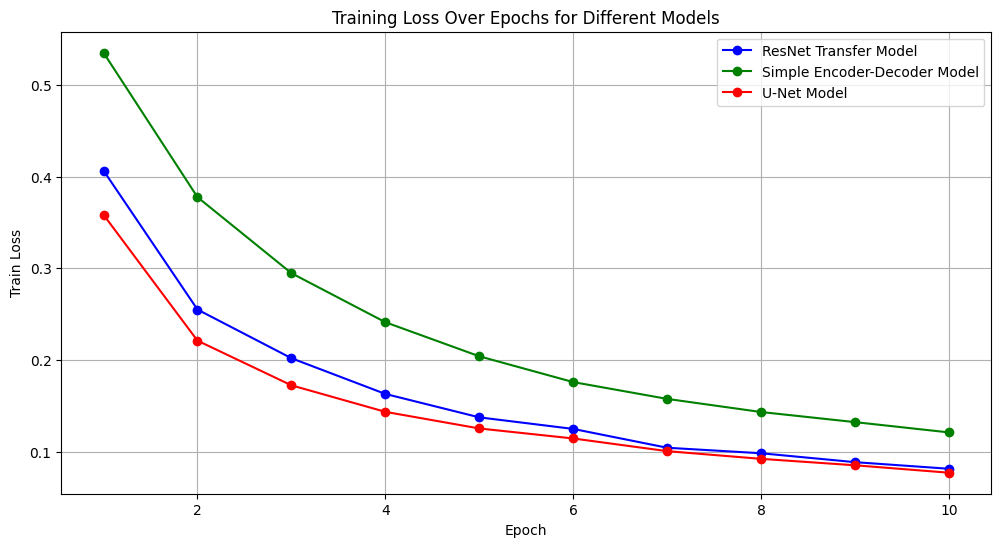

In [ ]:
import matplotlib.pyplot as plt

# Data for each model
epochs = list(range(1, 11))

# Train loss values for each model
resnet_losses = [0.4064, 0.2551, 0.2021, 0.1632, 0.1377, 0.1251, 0.1046, 0.0986, 0.0889, 0.0817]
encoder_decoder_losses = [0.5348, 0.3775, 0.2947, 0.2413, 0.2042, 0.1761, 0.1578, 0.1435, 0.1325, 0.1213]
unet_losses = [0.3583, 0.2212, 0.1726, 0.1437, 0.1256, 0.1147, 0.1009, 0.0925, 0.0855, 0.0774]

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(epochs, resnet_losses, marker='o', linestyle='-', color='blue', label='ResNet Transfer Model')
plt.plot(epochs, encoder_decoder_losses, marker='o', linestyle='-', color='green', label='Simple Encoder-Decoder Model')
plt.plot(epochs, unet_losses, marker='o', linestyle='-', color='red', label='U-Net Model')

plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Over Epochs for Different Models')
plt.grid(True)
plt.legend()
plt.savefig('train_loss_comparison.png')  # Save the plot as a .png file
plt.show()


## Loss Effect (do again the plots)

In [ ]:
import matplotlib.pyplot as plt

# Data for training loss
smooth_l1_loss = [0.5533, 0.4200, 0.4125, 0.3851, 0.3602, 0.3364, 0.3427, 0.3115, 0.2993, 0.2731]
l1_loss = [0.9202, 0.7927, 0.7192, 0.6844, 0.6515, 0.6396, 0.6322, 0.5951, 0.5630, 0.5621]

# Epochs
epochs = range(1, len(smooth_l1_loss) + 1)

# Plotting the training loss
plt.figure(figsize=(8, 5), dpi=300)  # High resolution for LaTeX
plt.plot(epochs, smooth_l1_loss, 'o-', label='SmoothL1Loss', markersize=5, linewidth=1.5)
plt.plot(epochs, l1_loss, 's-', label='L1Loss', markersize=5, linewidth=1.5)

# Adjusting font sizes for better readability
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Training Loss', fontsize=12)
plt.title('UNet - Training Loss Comparison: SmoothL1Loss vs L1Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)

# Saving the figure as a high-resolution PNG, suitable for LaTeX
plt.savefig('unet_training_loss_comparison.png', bbox_inches='tight', pad_inches=0.05)

# Displaying the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data for training loss
resnet_smooth_l1_loss = [0.8119, 0.6987, 0.5621, 0.5009, 0.4760, 0.4542, 0.4262, 0.4211, 0.3862, 0.3693]
resnet_l1_loss = [0.9898, 0.7908, 0.7554, 0.7398, 0.6959, 0.6766, 0.6465, 0.6387, 0.6215, 0.5903]
unet_smooth_l1_loss = [0.5533, 0.4200, 0.4125, 0.3851, 0.3602, 0.3364, 0.3427, 0.3115, 0.2993, 0.2731]
unet_l1_loss = [0.9202, 0.7927, 0.7192, 0.6844, 0.6515, 0.6396, 0.6322, 0.5951, 0.5630, 0.5621]

# Epochs
epochs = range(1, len(resnet_smooth_l1_loss) + 1)

# Plotting the training loss
plt.figure(figsize=(10, 6), dpi=300)  # Slightly larger figure for better readability

plt.plot(epochs, resnet_smooth_l1_loss, 'o-', label='ResNet SmoothL1Loss', markersize=5, linewidth=1.5)
plt.plot(epochs, resnet_l1_loss, 's-', label='ResNet L1Loss', markersize=5, linewidth=1.5)
plt.plot(epochs, unet_smooth_l1_loss, '^-', label='UNet SmoothL1Loss', markersize=5, linewidth=1.5)
plt.plot(epochs, unet_l1_loss, 'D-', label='UNet L1Loss', markersize=5, linewidth=1.5)

# Adjusting font sizes for better readability
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Training Loss', fontsize=12)
plt.title('Training Loss Comparison: ResNet vs UNet, SmoothL1Loss vs L1Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)

# Saving the figure as a high-resolution PNG, suitable for LaTeX
plt.savefig('combined_training_loss_comparison.png', bbox_inches='tight', pad_inches=0.05)

# Displaying the plot
plt.show()

## SImpleCNN vs Enc- Decoder

In [ ]:
import matplotlib.pyplot as plt

# Data for training loss
encDec_loss = [0.5348, 0.3775, 0.2947, 0.2413, 0.2042,0.1761, 0.1578, 0.1435, 0.1325, 0.1213]
resNet_loss = [0.4064, 0.2551, 0.2021, 0.1632, 0.1377,0.1251, 0.1046, 0.0986, 0.0889, 0.0817]

# Epochs
epochs = range(1, len(encDec_loss) + 1)

# Plotting the training loss
plt.figure(figsize=(8, 5), dpi=300)  # High resolution for LaTeX
plt.plot(epochs, encDec_loss, 'o-', label='Simple feature extractor', markersize=5, linewidth=1.5)
plt.plot(epochs, resNet_loss, 's-', label='Pre-trained features extractor', markersize=5, linewidth=1.5)

# Adjusting font sizes for better readability
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Training Loss', fontsize=12)
plt.title('Training Loss Comparison: Transfer Learning Effect', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)

# Saving the figure as a high-resolution PNG, suitable for LaTeX
plt.savefig('feature extractor comparison.png', bbox_inches='tight', pad_inches=0.05)

# Displaying the plot
plt.show()

## Data Augmentation Effect

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 11))
aug_false = [0.8934, 0.5851, 0.5599, 0.5203, 0.5014, 0.4829, 0.4578, 0.4583, 0.4351, 0.4225]
aug_true = [0.7113, 0.5840, 0.5577, 0.5282, 0.4978, 0.5004, 0.4714, 0.4576, 0.4457, 0.4209]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, aug_false, label='Augmentation False', marker='o')
plt.plot(epochs, aug_true, label='Augmentation True', marker='o')

# Customize the plot
plt.title('Effect of Data Augmentation on Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data for training loss
aug_false = [0.8934, 0.5851, 0.5599, 0.5203, 0.5014, 0.4829, 0.4578, 0.4583, 0.4351, 0.4225]
aug_true = [0.7113, 0.5840, 0.5577, 0.5282, 0.4978, 0.5004, 0.4714, 0.4576, 0.4457, 0.4209]

# Epochs
epochs = range(1, len(aug_false) + 1)

# Plotting the training loss
plt.figure(figsize=(8, 5), dpi=300)  # High resolution for LaTeX
plt.plot(epochs, aug_false, 'o-', label='Augmentation False', markersize=5, linewidth=1.5)
plt.plot(epochs, aug_true, 's-', label='Augmentation True', markersize=5, linewidth=1.5)

# Adjusting font sizes for better readability
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Training Loss', fontsize=12)
plt.title('Effect of Data Augmentation on Training Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)

# Saving the figure as a high-resolution PNG, suitable for LaTeX
plt.savefig('data augmentation effect.png', bbox_inches='tight', pad_inches=0.05)

# Displaying the plot
plt.show()